##### Data distribution plot

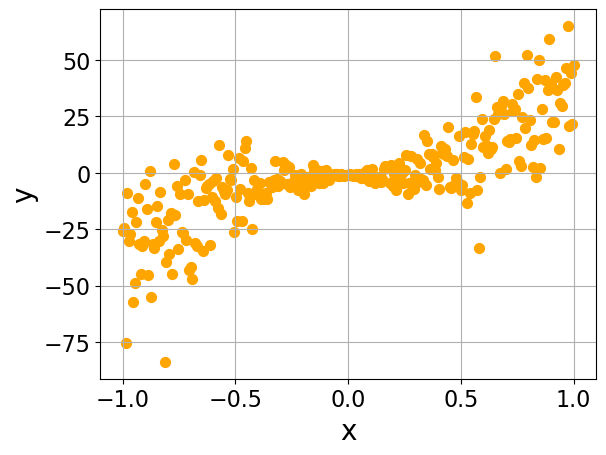

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from models.ensemble_pi import Bootstrap_PI
from models.tensorflow_pi import TF_PI
from utils.plot_func import plot_simple_boundary
from utils.tools import Loss_func


# create some data
def gen_data(n=50, bound=1, deg=3, beta=1, noise=0.9, intcpt=-1):
    x = np.linspace(-bound, bound, n)[:, np.newaxis]
    h = np.linspace(-bound, bound, n)[:, np.newaxis]
    e = np.random.randn(*x.shape) * (0.1 + 20 * np.abs(x))
    y = 50 * (x ** deg) + h * beta + noise * e + intcpt
    return x, y.squeeze()

n_samples = 300
x, y = gen_data(n_samples, noise=1.0)

plt.figure(1)
plt.scatter(x,y,s=50,color='orange')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.grid()
plt.tick_params(labelsize=16)

##### Polynomial fit result

mse=141.25,r_2=1.0,mae=8.0


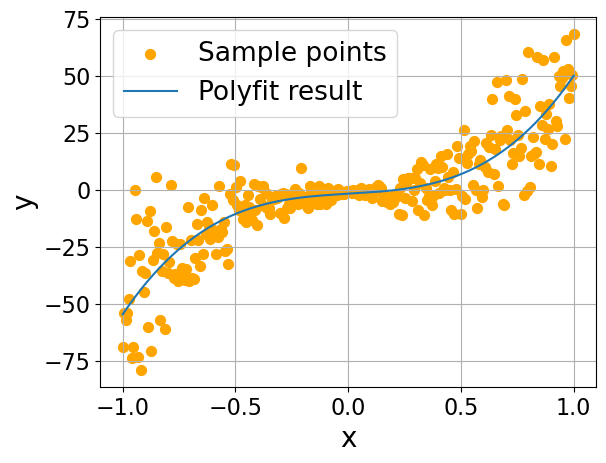

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


def gen_data(n=50, bound=1, deg=3, beta=1, noise=0.9, intcpt=-1):
    x = np.linspace(-bound, bound, n)[:, np.newaxis]
    h = np.linspace(-bound, bound, n)[:, np.newaxis]
    e = np.random.randn(*x.shape) * (0.1 + 20 * np.abs(x))
    y = 50 * (x ** deg) + h * beta + noise * e + intcpt
    return x, y.squeeze()

n_samples = 300
x, y = gen_data(n_samples, noise=1.0)
degree = 3
coeffs = np.polyfit(x.squeeze(), y, degree)
model = np.poly1d(coeffs)

y_predict = model(x)
mse = mean_squared_error(y,y_predict)
r2 = r2_score(y,y_predict)
mae = mean_absolute_error(y,y_predict)
print('mse={},r_2={},mae={}'.format(np.round(mse,2),np.round(r2),np.round(mae)))

plt.figure(1)
plt.scatter(x,y,s=50,color='orange',label='Sample points')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.plot(np.linspace(-1,1,n_samples),y_predict,label='Polyfit result')
plt.legend(fontsize=19)
plt.grid()
plt.tick_params(labelsize=16)

#### Different alphas test

100%|██████████| 4/4 [02:18<00:00, 34.68s/it]


[array([ 0.81,  4.87,  8.22, 13.17]), array([ 0.86,  7.58,  8.53, 16.21]), array([ 0.91,  8.29,  8.41, 16.84]), array([ 0.95, 10.98,  8.88, 19.86])]


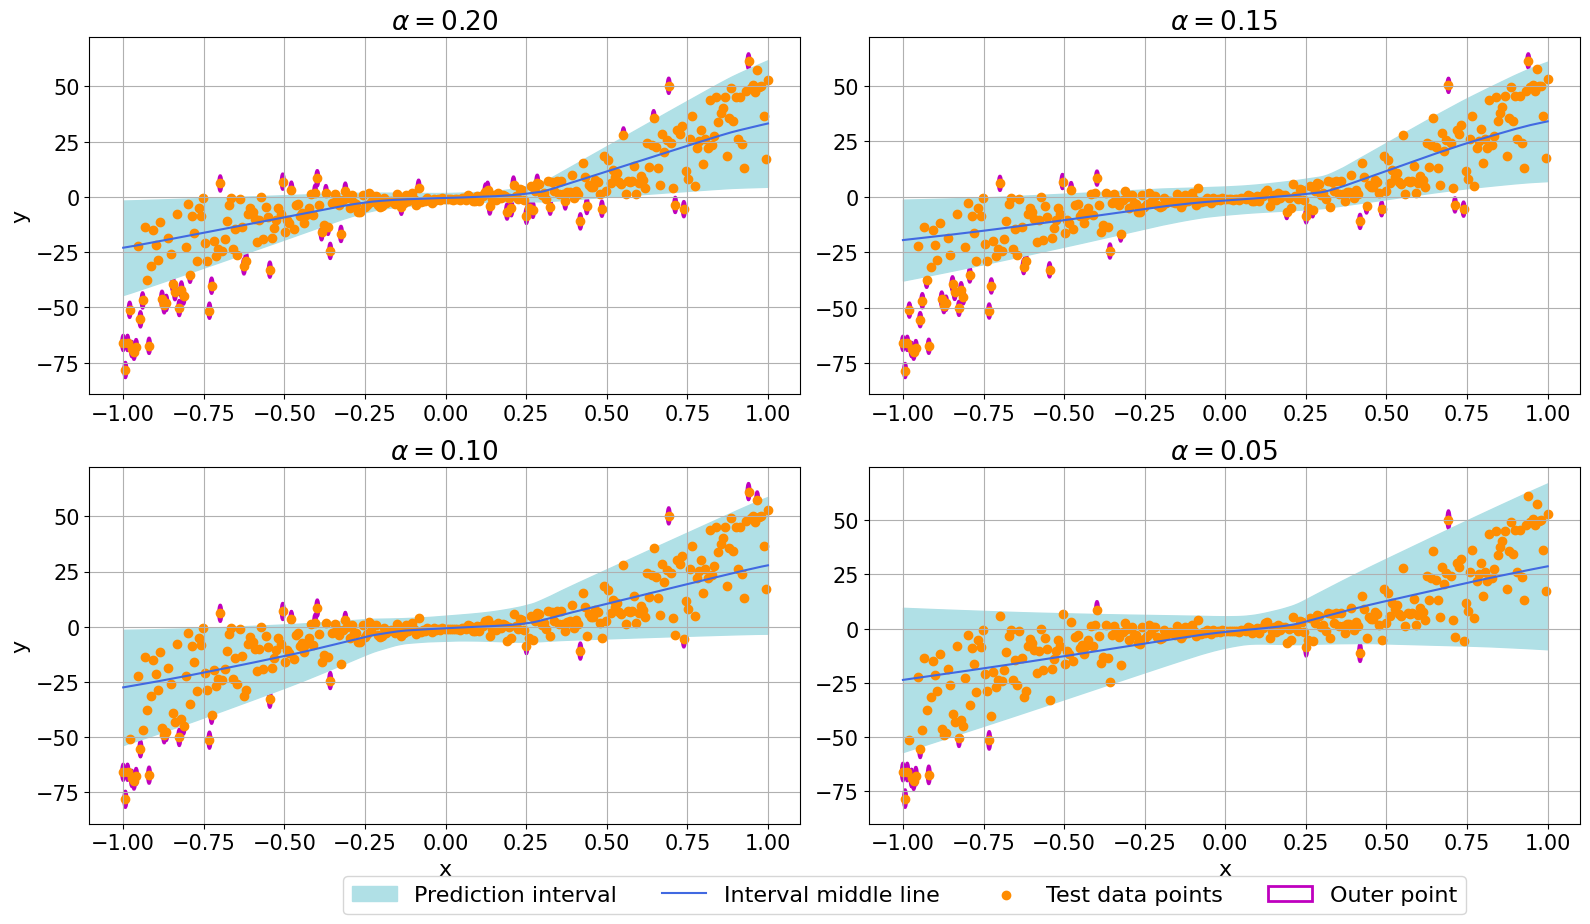

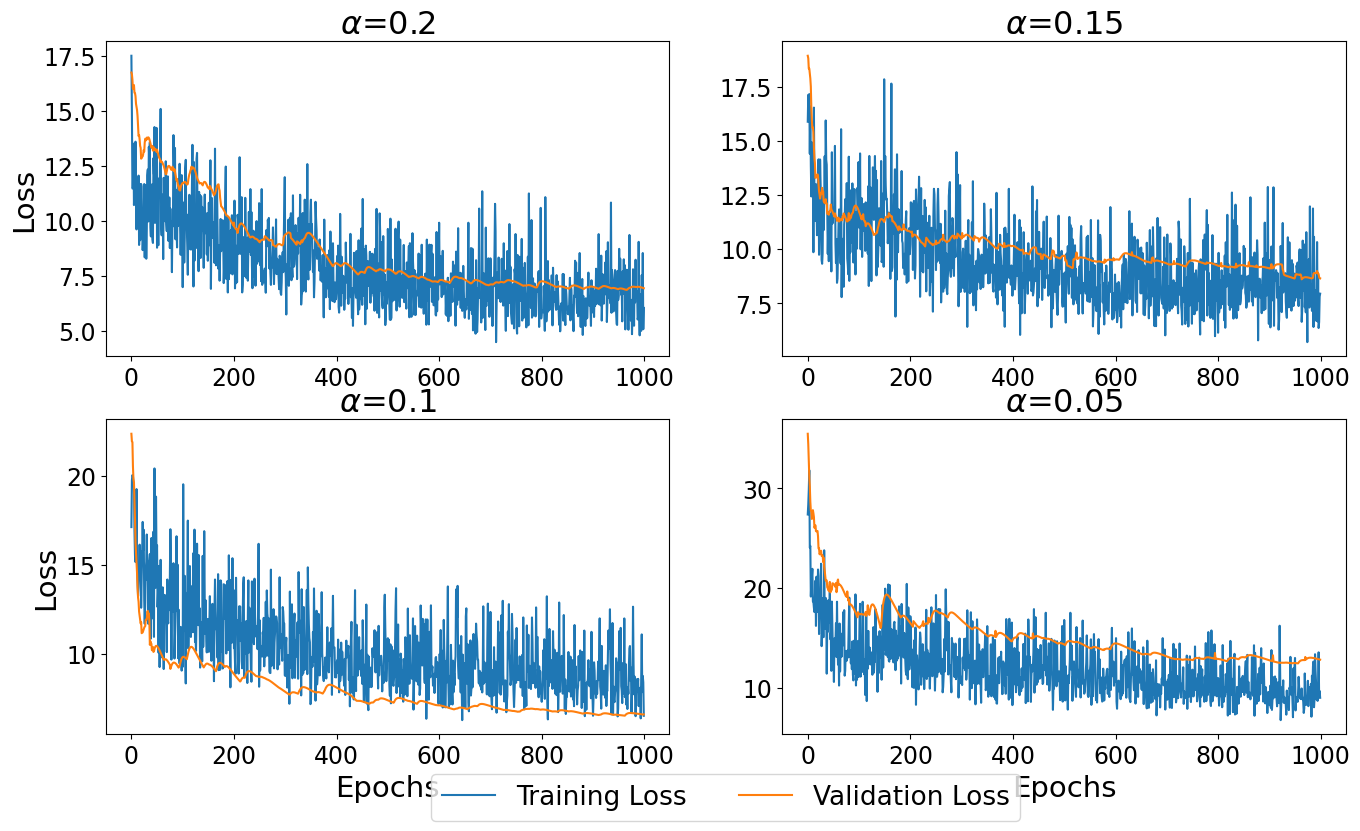

In [1]:
import numpy as np

from models.ensemble_pi import diff_alphas_PI
from utils.plot_func import subplot_fit_process, subplot_multi_boundary_2


def gen_data(n=50, bound=1, deg=3, beta=1, noise=0.9, intcpt=-1):
    x = np.linspace(-bound, bound, n)[:, np.newaxis]
    h = np.linspace(-bound, bound, n)[:, np.newaxis]
    e = np.random.randn(*x.shape) * (0.1 + 20 * np.abs(x))
    y = 50 * (x ** deg) + h * beta + noise * e + intcpt
    return x, y.squeeze()

n_samples = 300
x, y = gen_data(n_samples, noise=0.9)

alphas = [0.2, 0.15, 0.1, 0.05]
# A higher weight for PICP ensures that the samples on the side can be included in the PI.
result_all, index_all, outlier_list, hist = diff_alphas_PI(
    x, y, x, range(len(x)), range(len(x)), alphas, weight=[3, 0.5, 0.5])

print(index_all)
subplot_multi_boundary_2(result_all, alphas, outlier_list,
                       x.squeeze(),  y)

subplot_fit_process(hist, alphas)